### Pytorch custom datasets

In [ ]:
import torch
from torch import nn
import os

print(torch.__version__)

In [ ]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [5]:
# Download datasets
import requests
import zipfile
from pathlib import Path


# Set path to data folder
data_path = Path("data")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"{image_path} directory does not exist.")
    image_path.mkdir(exist_ok=True, parents=True)

    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak and sushi images")
        f.write(request.content)

    # Unzip data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", 'r') as zip_ref:
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory does not exist.


## Become one with dara (data preparation)

In [14]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [15]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.


In [19]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/train/pizza/1285298.jpg
Image class: pizza
Image height: 341
Image width: 512


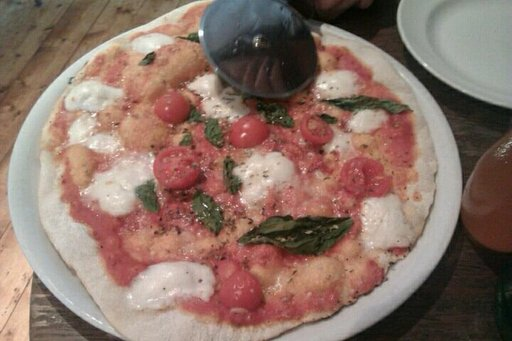

In [85]:
# Visualize images
import random
from PIL import Image

# Set seed
random.seed(42)

# Get all image path (* means "any colaration")
image_path_list = list(image_path.glob("*/*/*.jpg"))


# Get random image path
random_image_path = random.choice(image_path_list)


# Get image classes
image_class = random_image_path.parent.stem

# Open image
image = Image.open(random_image_path)
# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {image.height}") 
print(f"Image width: {image.width}")
image

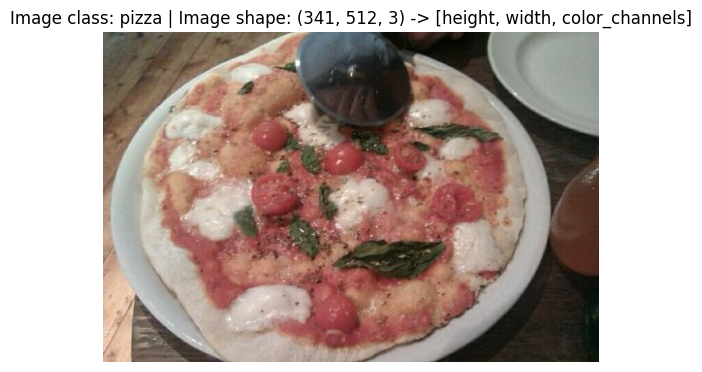

In [90]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.array(image)

plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis("off")
plt.show()

## Transforming data

In [91]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Transform data with torchvision.transforms

In [98]:
data_transform = transforms.Compose([
    transforms.RandomResizedCrop(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [100]:
img_as_tensor = torch.from_numpy(img_as_array)

In [ ]:
image_path_list

[PosixPath('data/pizza_steak_sushi/train/pizza/2576168.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2121603.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3441394.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2190018.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/739735.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3699992.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3109486.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/38349.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1660415.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1089334.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2821048.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2885796.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2885050.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2428085.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3338774.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2330965.jpg'),
 PosixPath(

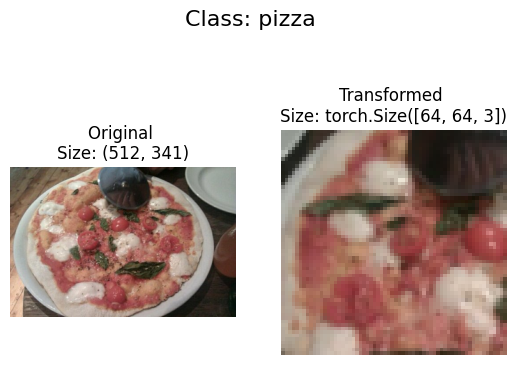

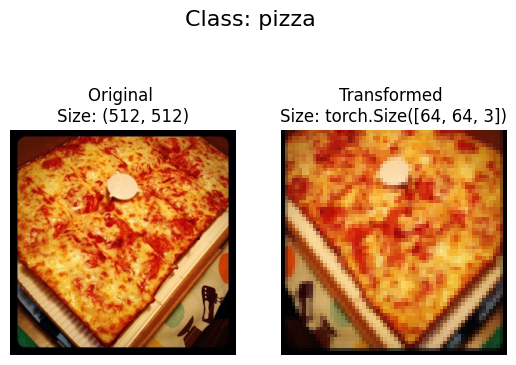

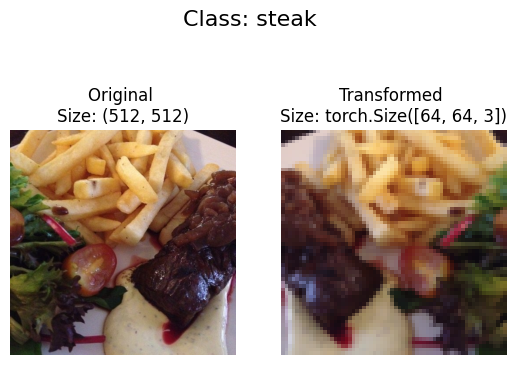

In [122]:
def plot_transformed_images(image_path, transform, n=3, seed=42):



    random.seed(seed)

    random_image_path = random.sample(image_path, k=n)

    for image_path in random_image_path:

        with Image.open(image_path) as img:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(img)
            ax[0].set_title(f"Original \nSize: {img.size}")
            ax[0].axis("off")

            transformed_image = transform(img).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path=image_path_list, transform=data_transform)